# Visualising time trends

http://www.sthda.com/english/articles/32-r-graphics-essentials/128-plot-time-series-data-using-ggplot/

### We will use:

 - Discrete points in time:
    - Bar Chart 
    - Scatter Plot
 - Continuous points in time
    - Line Chart
    - Step Chart
- Handling multiple dimensions over time
    - Stacked bar chart
    - Area Chart
    - Stream Graph
    - Small Multiples
    - Animation

### But first:
 - Find time trend data.
     - Source the data, and **check that it read properly**
     - Make sure the 'time' columns are properly formatted. (Use the packages 'lubridate' and 'zoo')
 - Reshape the data so we have:
    - A numeric / ordinal x-axis representing time.
    - A numeric y-axis
    - Encodings for other dimensions.

https://data.gov.ie/dataset/dublin-airport-daily-data

This table contains daily elements measured at our synoptic station in Dublin_Airport, Co Dublin. The file is updated monthly.


 ### Daily Elements:
 

ID	|    ELEMENT   |   Unit      
:---|:---|:---
rain	|        Precipitation Amount      |  mm|
maxtp     |  	Maximum Air Temperature	   |   °C	|  
mintp      |   	Minimum  Air Temperature	|   °C|
gmin		|09utc Grass Minimum Temperature	| 						  °C|
soil	|	Mean 10cm Soil Temperature 			| 			          °C	|
wdsp	|	Mean Wind Speed				    |                               	  knot|
hm	|	Highest 10 minute mean wind speed			| 		          knot |                
ddhm	|	Mean wind direction over 10 minutes at time of highest mean		 |         degree|
hg		| Highest Gust			| 					          knot|
cbl		| Mean CBL Pressure 							|          hpa |
sun		| Sunshine duration							    |      hours|
g_rad  |   	Global Radiation 							|          j/cm sq.| 
pe		| Potential Evapotranspiration - calculated using Penman-Monteith Equation |	  mm|
evap	| 	Evaporation - calculated using Penman formula 				  |        mm|
smd_wd	| 	Soil Moisture Deficits for well drained soils         |	         		  mm|
smd_md	| 	Soil Moisture Deficits for moderately drained soils   |	calculated values	  mm|
smd_pd	| 	Soil Moisture Deficits for poorly drained soils	      | 			  mm
dos		| Dept of Snow								          cm
ind	|	Indicator| (i)

### Load the libraries
 - tidyverse provides ggplot and some of the tidying libraries.
 - lubridate and zoo are good for handling dates.
 - ggstream allows us to do stream graphs.
 - if we want to use specialized themes, we could includ ggthemes.

In [1]:
library(tidyverse)#  This library includes ggplot and a few others.
library(lubridate)
library(zoo)

library(ggstream)


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




### Handle file reading errors

 - In this file there is an explanation of the rows at the start of the file, so a standard read.csv doesn't work.  In this case, let's intercept it and see what the problem is.
 - As in other languages, try ... will attempt the read and trap the error if one occurs.

In [72]:
datasetname = "https://cli.fusio.net/cli/climate_data/webdata/dly532.csv"
# dfdub<-read.csv(datasetname)


mtry <- try(read.csv(datasetname), 
            silent = TRUE)

if (class(mtry) != "try-error") {
  read.csv(datasetname, sep = ",", header = TRUE)
} else {
  message("File doesn't exist, please check")
}

File doesn't exist, please check



What happened?  Let's open the file in Excel...

It turns out that the top 25 lines are comments.  We'll skip them.

In [2]:
dfdub<-read.csv(datasetname,skip=25)

str(dfdub)

'data.frame':	29612 obs. of  26 variables:
 $ date  : chr  "01-jan-1942" "02-jan-1942" "03-jan-1942" "04-jan-1942" ...
 $ ind   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ maxtp : num  9.7 9.9 11.2 9.2 3.5 5.1 7.1 7.1 4.5 5.3 ...
 $ ind.1 : int  0 0 0 0 1 0 0 0 0 1 ...
 $ mintp : num  6.8 7.9 8.9 2.7 -0.8 0.7 0.5 1.4 0.7 -2.8 ...
 $ igmin : int  0 0 0 0 0 1 1 0 0 1 ...
 $ gmin  : num  4.7 6.7 7.2 3.4 0 -3.7 -1 0.2 0.9 -4.1 ...
 $ ind.2 : int  2 0 0 0 0 2 3 3 0 3 ...
 $ rain  : num  0 0.1 1.5 3.5 0.6 0 0 0 0.2 0 ...
 $ cbl   : num  1020 1016 1007 1002 1013 ...
 $ wdsp  : num  17.2 15.2 14 17 13 9.7 10.3 9.3 11.8 4 ...
 $ ind.3 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hm    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ ind.4 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ddhm  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ ind.5 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hg    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ sun   : num  0 0 0.1 0.6 3.4 0.1 4 3.7 0.6 5 ...
 $ dos   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ g_rad : int  NA NA N

### Preparing our data.  

We need to 
 - make our time column be time / date.
 - Check out what is in our dataset.
 - Pick or make columns we want to visualise.
 - How many dimensions do we want to visualise?  How will we encode them?
 - Are they in the right format or do we need to pivot?
 - Do we have the correct relationship between the x and y axis (do we need to summarise?).

Oh, the date is a string.  Let's convert that.

In [3]:
as.Date('10-jan-1942', format = "%d-%b-%Y")

[1] "1942-01-10"

That works, so we'll apply that format to our dates,

In [4]:
dfdub$date <- as.Date(dfdub$date,  format = "%d-%b-%Y")

In [5]:
head(dfdub)

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,⋯,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
,<date>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1942-01-01,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,⋯,NA,0.0,0,NA,NA,1.1,1.4,NA,NA,NA
2,1942-01-02,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,⋯,NA,0.0,0,NA,NA,0.7,0.9,NA,NA,NA
3,1942-01-03,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,⋯,NA,0.1,0,NA,NA,0.5,0.6,NA,NA,NA
4,1942-01-04,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,⋯,NA,0.6,0,NA,NA,0.6,0.7,NA,NA,NA
5,1942-01-05,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,⋯,NA,3.4,0,NA,NA,0.6,0.7,NA,NA,NA
6,1942-01-06,0,5.1,0,0.7,1,-3.7,2,0.0,1021.1,⋯,NA,0.1,0,NA,NA,0.4,0.5,NA,NA,NA


Have a quick look at the data.  What about NAs?  What is ind.1 and what are its values?  How many rows are there?

What unique values do we have?

In [6]:
unique(dfdub$hg)

[1] NA 40 14 35 46 31 41 38 22 13 27 24 25  9 32 33 26 30 20 43 37 29 28 23 36
[26] 17 16 19 18  7 34 15 10 39 52 47 21 11 49 12 44 42 54 45 53 50 51  5  8 59
[51] 48 55 62 58  6 68 56 57 60 61 73 67 63 69 64 71 66 70 75 65  4  3 76 80

Let's look at the rows that have NAs in hg

In [88]:
nrow(dfdub[is.na(dfdub$hg),])
head(dfdub[is.na(dfdub$hg),])


[1] 887

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,⋯,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
,<date>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1942-01-01,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,⋯,NA,0.0,0,NA,NA,1.1,1.4,NA,NA,NA
2,1942-01-02,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,⋯,NA,0.0,0,NA,NA,0.7,0.9,NA,NA,NA
3,1942-01-03,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,⋯,NA,0.1,0,NA,NA,0.5,0.6,NA,NA,NA
4,1942-01-04,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,⋯,NA,0.6,0,NA,NA,0.6,0.7,NA,NA,NA
5,1942-01-05,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,⋯,NA,3.4,0,NA,NA,0.6,0.7,NA,NA,NA
6,1942-01-06,0,5.1,0,0.7,1,-3.7,2,0.0,1021.1,⋯,NA,0.1,0,NA,NA,0.4,0.5,NA,NA,NA


In [7]:
unique(dfdub$ind.1)

[1] 0 1 2

In [8]:
nrow(dfdub)

[1] 29612

Often we're only interested in some of the attributes:

In [9]:
colnames(dfdub)

[1] "date"   "ind"    "maxtp"  "ind.1"  "mintp"  "igmin"  "gmin"   "ind.2" 
 [9] "rain"   "cbl"    "wdsp"   "ind.3"  "hm"     "ind.4"  "ddhm"   "ind.5" 
[17] "hg"     "sun"    "dos"    "g_rad"  "soil"   "pe"     "evap"   "smd_wd"
[25] "smd_md" "smd_pd"

Let's stick with temperature, rain and sun.

In [89]:
tdf <- dfdub[c('date','maxtp','mintp','rain','sun')]

In [90]:
str(tdf)

'data.frame':	29612 obs. of  5 variables:
 $ date : Date, format: "1942-01-01" "1942-01-02" ...
 $ maxtp: num  9.7 9.9 11.2 9.2 3.5 5.1 7.1 7.1 4.5 5.3 ...
 $ mintp: num  6.8 7.9 8.9 2.7 -0.8 0.7 0.5 1.4 0.7 -2.8 ...
 $ rain : num  0 0.1 1.5 3.5 0.6 0 0 0 0.2 0 ...
 $ sun  : num  0 0 0.1 0.6 3.4 0.1 4 3.7 0.6 5 ...


Let's pivot our data, so we can visualise it on a line chart:

In [91]:
dfl <- tdf %>%
    pivot_longer( 
    cols = !date,
    names_to = "measurement",
    values_to = "value")

We'll work with dates a lot, so we'll add the month and year to the dataframe

In [92]:
dfl$year <- year(ymd(dfl$date))
dfl$month <- month(ymd(dfl$date))
dfl$Yearmon <- as.yearmon(ymd(dfl$date))
str(dfl)

tibble [118,448 × 6] (S3: tbl_df/tbl/data.frame)
 $ date       : Date[1:118448], format: "1942-01-01" "1942-01-01" ...
 $ measurement: chr [1:118448] "maxtp" "mintp" "rain" "sun" ...
 $ value      : num [1:118448] 9.7 6.8 0 0 9.9 7.9 0.1 0 11.2 8.9 ...
 $ year       : num [1:118448] 1942 1942 1942 1942 1942 ...
 $ month      : num [1:118448] 1 1 1 1 1 1 1 1 1 1 ...
 $ Yearmon    : 'yearmon' num [1:118448] Jan 1942 Jan 1942 Jan 1942 Jan 1942 ...


#### Let's try to do a bar chart with what we have, just for sunshine.  What dimensions do we have?
 - x axis - date
 - y axis - value

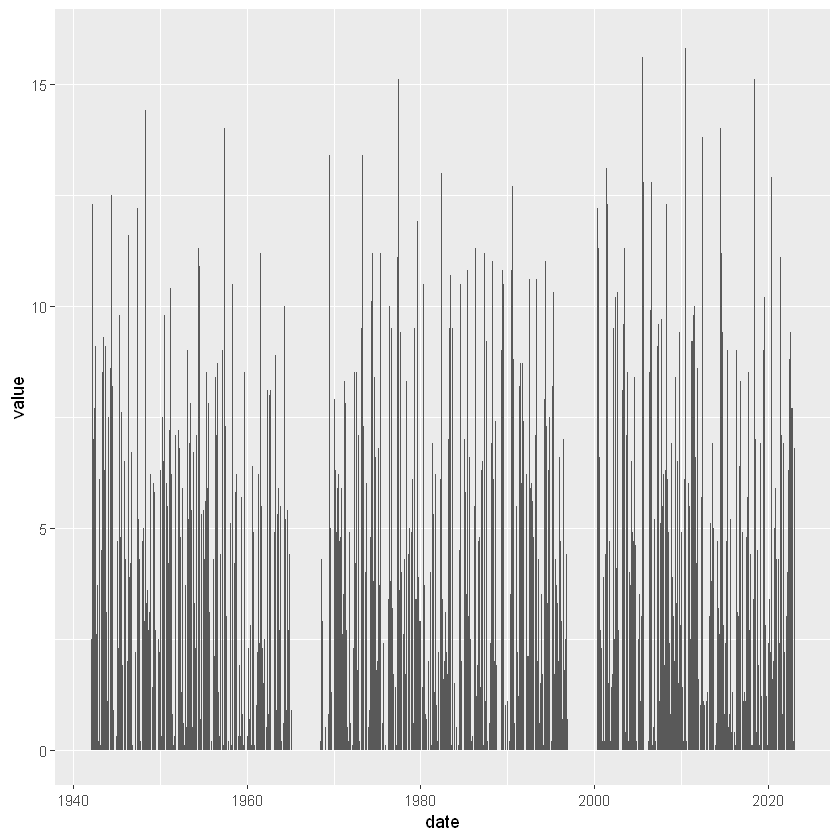

In [94]:
dflsun <- dfl[dfl$measurement == 'sun',]
ggplot(dflsun, aes(x=date, y=value))  +
geom_bar(stat='identity')

Try a scatter plot:

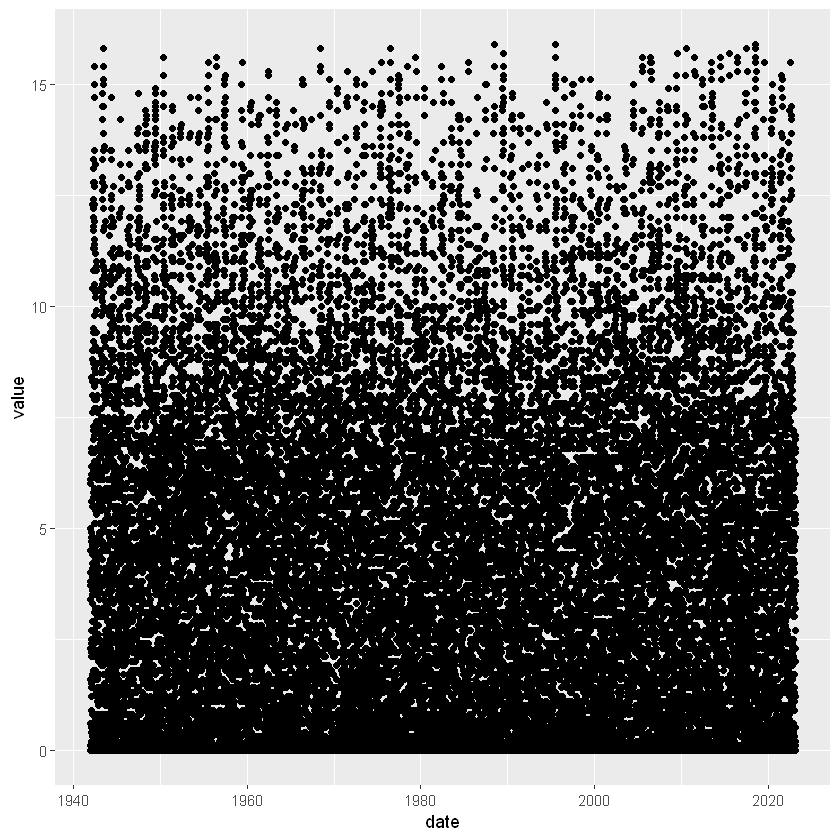

In [95]:
ggplot(dflsun, aes(x=date, y=value))  +
geom_point()

These charts on their own are not helpful.  We'll go back to the pivotted data with all values:

In [78]:
str(dfl)

tibble [118,448 × 7] (S3: tbl_df/tbl/data.frame)
 $ date       : Date[1:118448], format: "1942-01-01" "1942-01-01" ...
 $ measurement: chr [1:118448] "maxtp" "mintp" "rain" "sun" ...
 $ value      : num [1:118448] 9.7 6.8 0 0 9.9 7.9 0.1 0 11.2 8.9 ...
 $ year       : num [1:118448] 1942 1942 1942 1942 1942 ...
 $ month      : num [1:118448] 1 1 1 1 1 1 1 1 1 1 ...
 $ yearmon    : 'yearmon' num [1:118448] Jan 1942 Jan 1942 Jan 1942 Jan 1942 ...
 $ Yearmon    : 'yearmon' num [1:118448] Jan 1942 Jan 1942 Jan 1942 Jan 1942 ...


Let's try using month, instead of date:

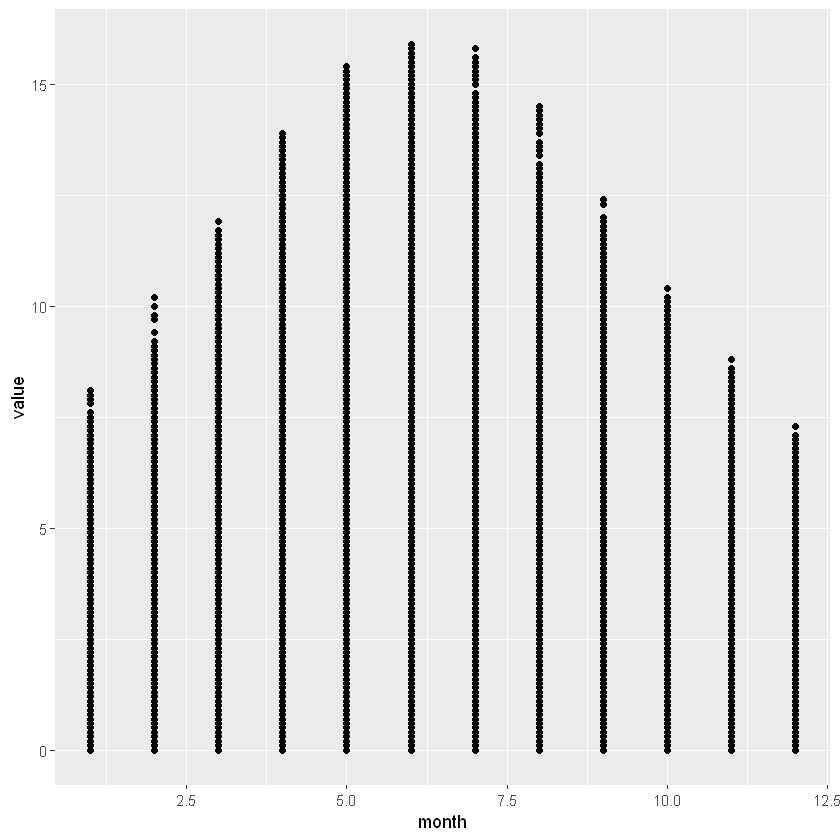

In [96]:
ggplot(dflsun, aes(x=month, y=value))  +
geom_point()

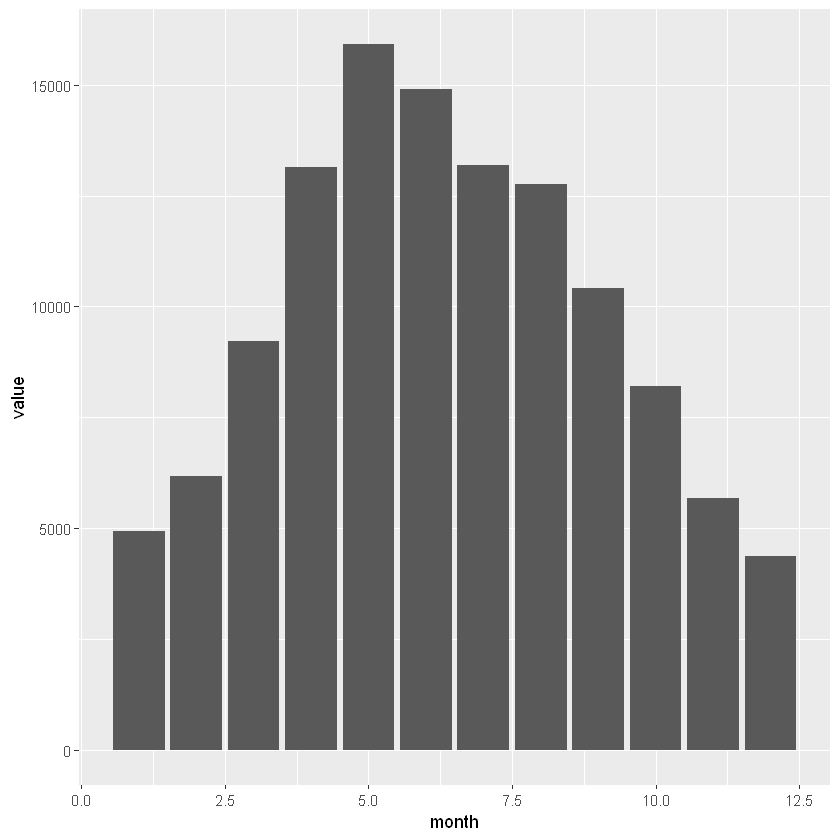

In [98]:
ggplot(dflsun, aes(x=month, y=value))  +
geom_bar(stat = 'identity')

### Conclusion
Bar charts and scatter plots work better with discrete time (months) rather than continuous time (dates)

### Line plots

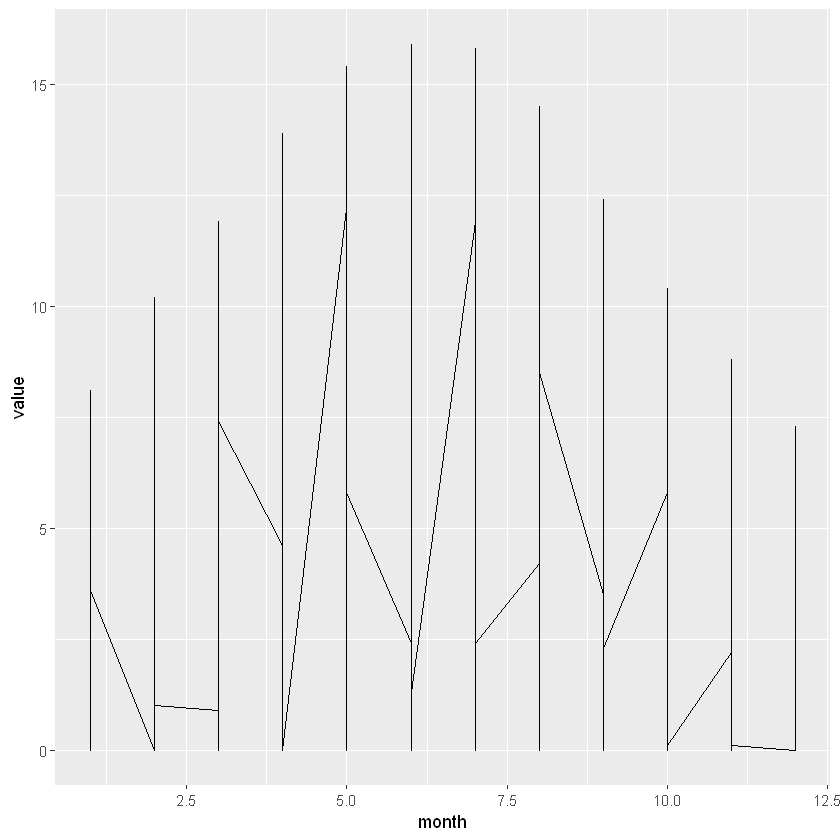

In [100]:

ggplot(dflsun, aes(x=month, y=value)) + geom_line()

This didn't work, because there are many values for each month.  We need to manipulate our data frame so that we have one value (we'll go for average) for each month, regardless of year.

In [17]:
str(dfl)

tibble [118,448 × 5] (S3: tbl_df/tbl/data.frame)
 $ date       : Date[1:118448], format: "1942-01-01" "1942-01-01" ...
 $ measurement: chr [1:118448] "maxtp" "mintp" "rain" "sun" ...
 $ value      : num [1:118448] 9.7 6.8 0 0 9.9 7.9 0.1 0 11.2 8.9 ...
 $ year       : num [1:118448] 1942 1942 1942 1942 1942 ...
 $ month      : num [1:118448] 1 1 1 1 1 1 1 1 1 1 ...


In [18]:
unique(dfl$month)

[1]  1  2  3  4  5  6  7  8  9 10 11 12

In [102]:
mondf <-
dfl %>%
  group_by(month, measurement) %>%
  summarize_at(vars(value), list(Average=mean), na.rm=TRUE)

In [104]:
str(mondf)

gropd_df [48 × 3] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ month      : num [1:48] 1 1 1 1 2 2 2 2 3 3 ...
 $ measurement: chr [1:48] "maxtp" "mintp" "rain" "sun" ...
 $ Average    : num [1:48] 7.75 2.34 2.13 1.94 7.96 ...
 - attr(*, "groups")= tibble [12 × 2] (S3: tbl_df/tbl/data.frame)
  ..$ month: num [1:12] 1 2 3 4 5 6 7 8 9 10 ...
  ..$ .rows: list<int> [1:12] 
  .. ..$ : int [1:4] 1 2 3 4
  .. ..$ : int [1:4] 5 6 7 8
  .. ..$ : int [1:4] 9 10 11 12
  .. ..$ : int [1:4] 13 14 15 16
  .. ..$ : int [1:4] 17 18 19 20
  .. ..$ : int [1:4] 21 22 23 24
  .. ..$ : int [1:4] 25 26 27 28
  .. ..$ : int [1:4] 29 30 31 32
  .. ..$ : int [1:4] 33 34 35 36
  .. ..$ : int [1:4] 37 38 39 40
  .. ..$ : int [1:4] 41 42 43 44
  .. ..$ : int [1:4] 45 46 47 48
  .. ..@ ptype: int(0) 
  ..- attr(*, ".drop")= logi TRUE


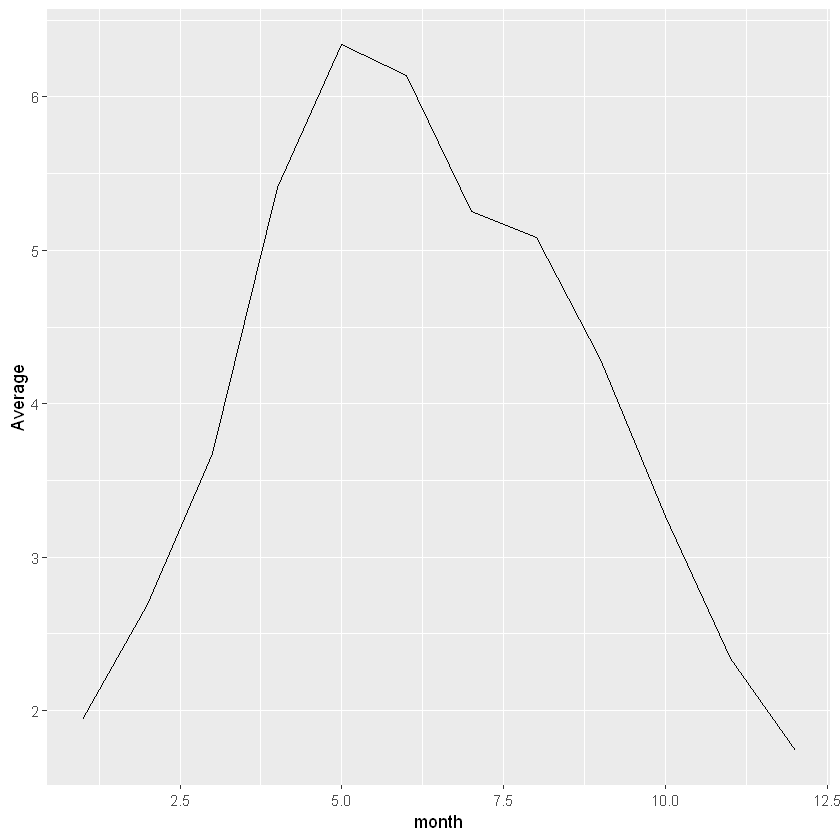

In [105]:
ggplot(mondf[mondf$measurement == 'sun',], aes(x=month, y=Average)) + geom_line()

In [19]:
unique(dfl$year)

[1] 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
[16] 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
[31] 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
[46] 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
[61] 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
[76] 2017 2018 2019 2020 2021 2022 2023

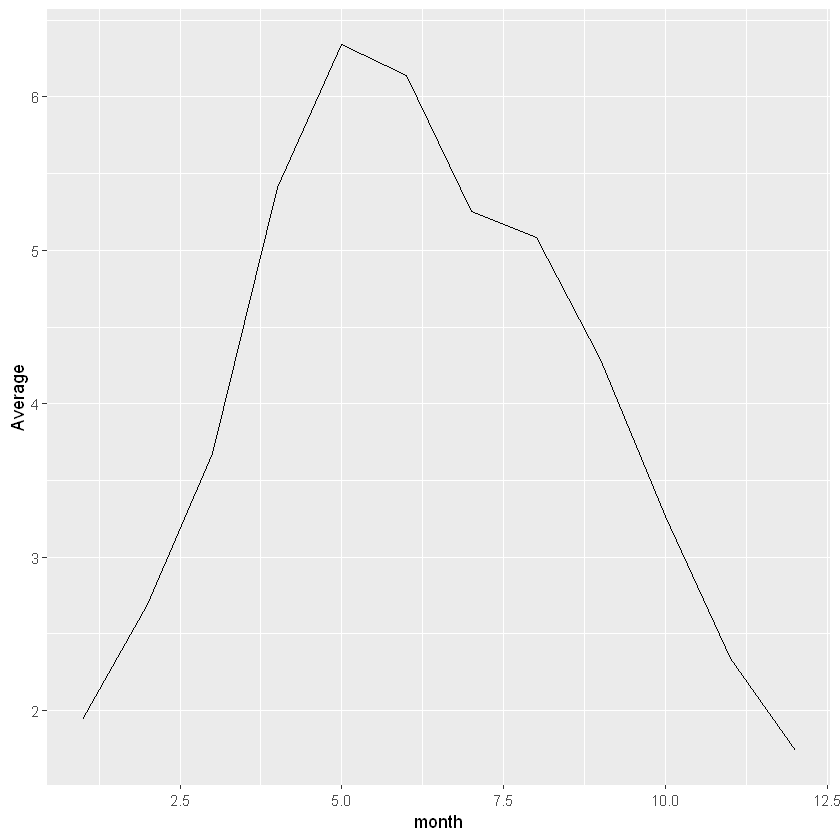

In [106]:
ggplot(mondf[mondf$measurement=='sun',], aes(x=month, y=Average)) + geom_line()

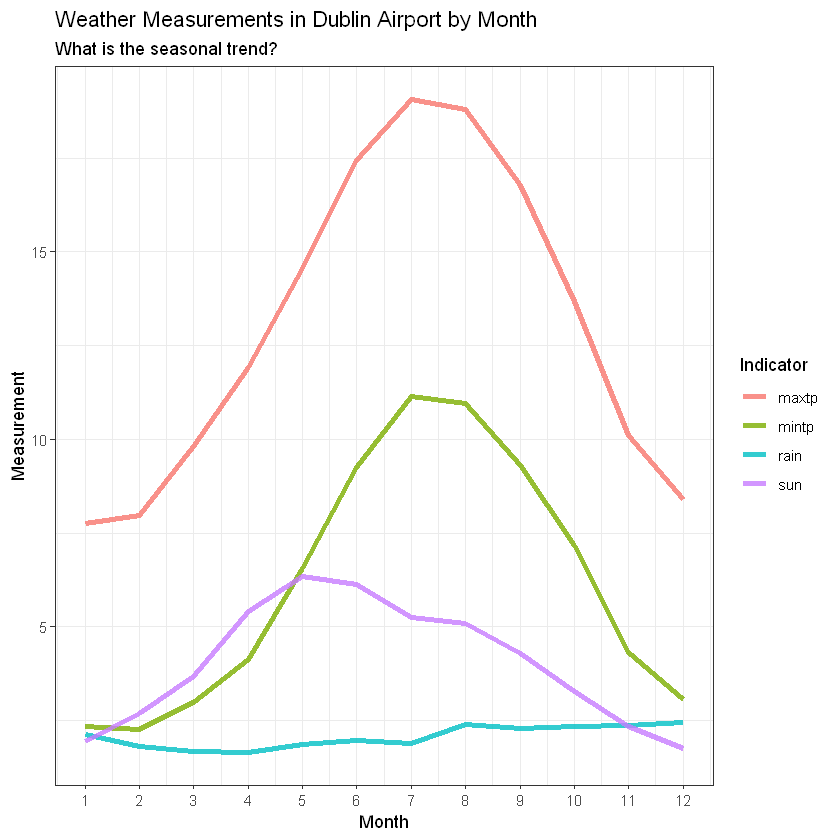

In [107]:
ggplot(mondf, aes(x=month, y=Average, colour = measurement)) + geom_line(linewidth=1.5, alpha=0.8) +
labs(title="Weather Measurements in Dublin Airport by Month",
    subtitle="What is the seasonal trend?",
    x="Month",
    y="Measurement",
    color="Indicator") +
theme_bw() +
theme(
    axis.title=element_text()) +
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12))

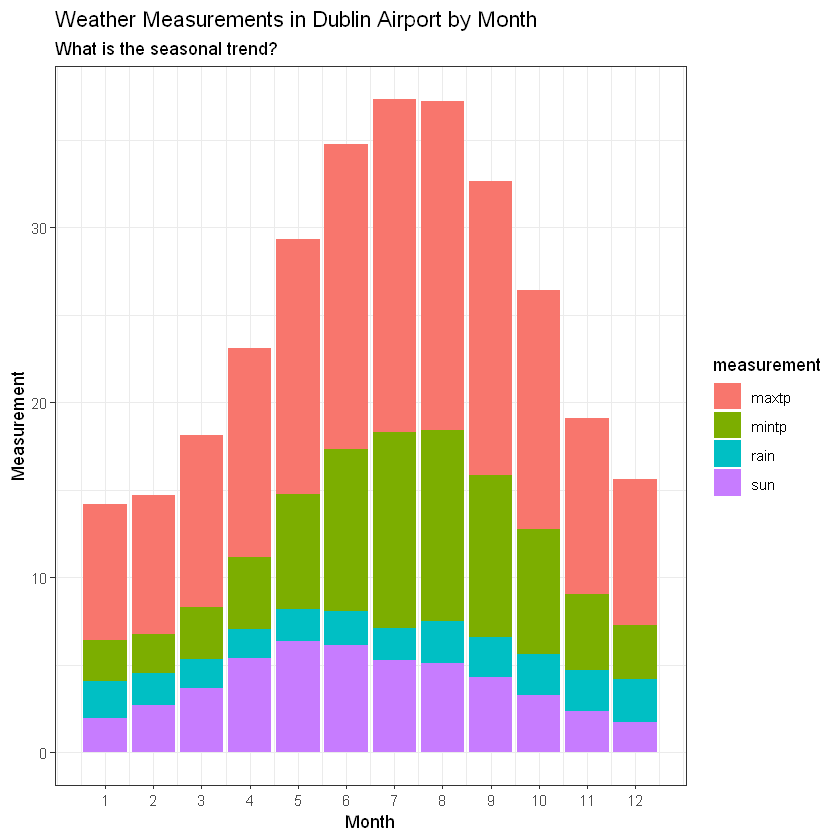

In [58]:
ggplot(mondf, aes(x=month, y=Average, fill=measurement)) +

geom_bar(stat='identity') +theme_classic() + 

labs(title="Weather Measurements in Dublin Airport by Month",
    subtitle="What is the seasonal trend?",
    x="Month",
    y="Measurement",
    color="Indicator") +
theme_bw() +
theme(
    axis.title=element_text()) +
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12))

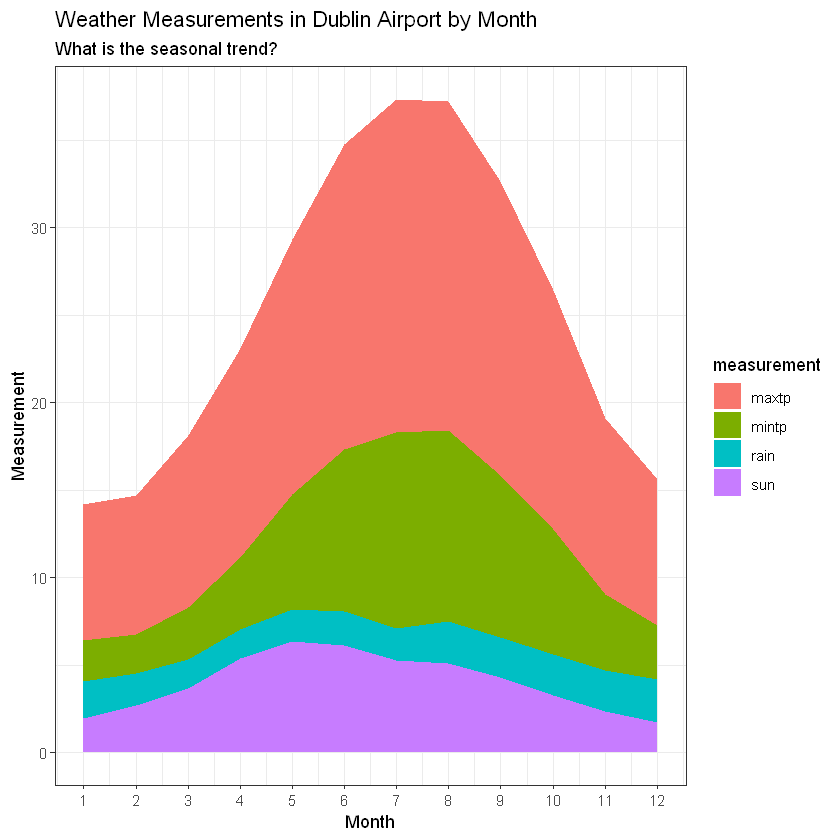

In [65]:
ggplot(mondf, aes(x=month, y=Average, fill=measurement)) +

geom_area(stat='identity') +theme_classic() + 

labs(title="Weather Measurements in Dublin Airport by Month",
    subtitle="What is the seasonal trend?",
    x="Month",
    y="Measurement",
    color="Indicator") +
theme_bw() +
theme(
    axis.title=element_text()) +
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12))

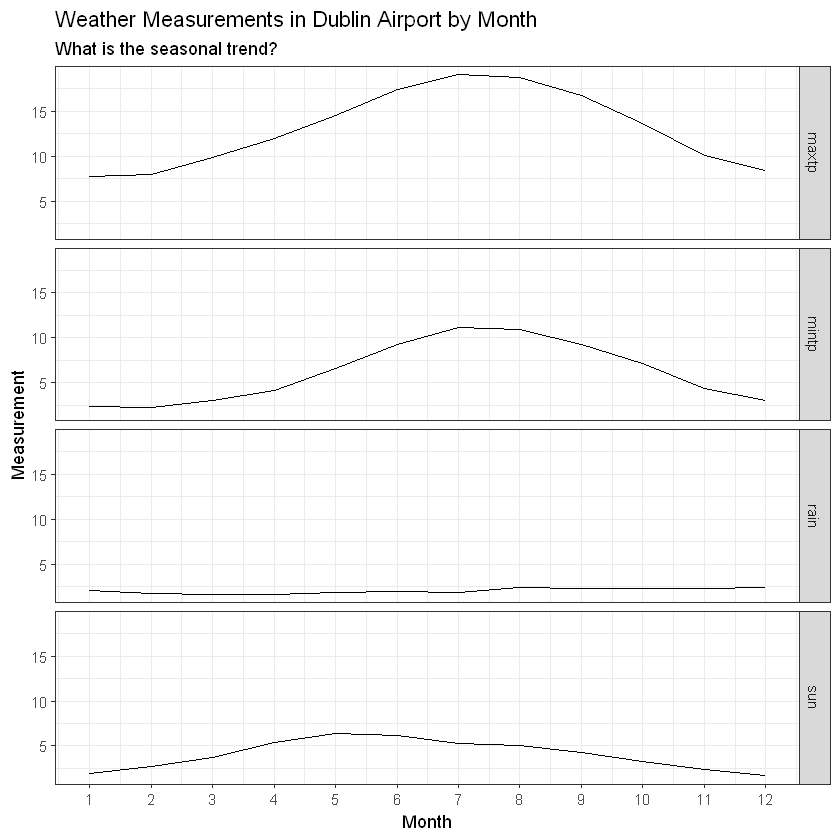

In [64]:
ggplot(mondf, aes(x=month, y=Average)) +

    facet_grid(facets = measurement~.) +
geom_line() + theme_classic() + 

labs(title="Weather Measurements in Dublin Airport by Month",
    subtitle="What is the seasonal trend?",
    x="Month",
    y="Measurement",
    color="Indicator") +
theme_bw() +
theme(
    axis.title=element_text()) +
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12))